# Tarea de Modelos Estocásticos (Teoría de Decisiones)

- **Alumno:** Eduardo Carrasco Vidal
- **Profesor:** Sergio Chaigneau
- **Curso:** Teoría de Decisiones y Complejidad en Ciencias Sociales

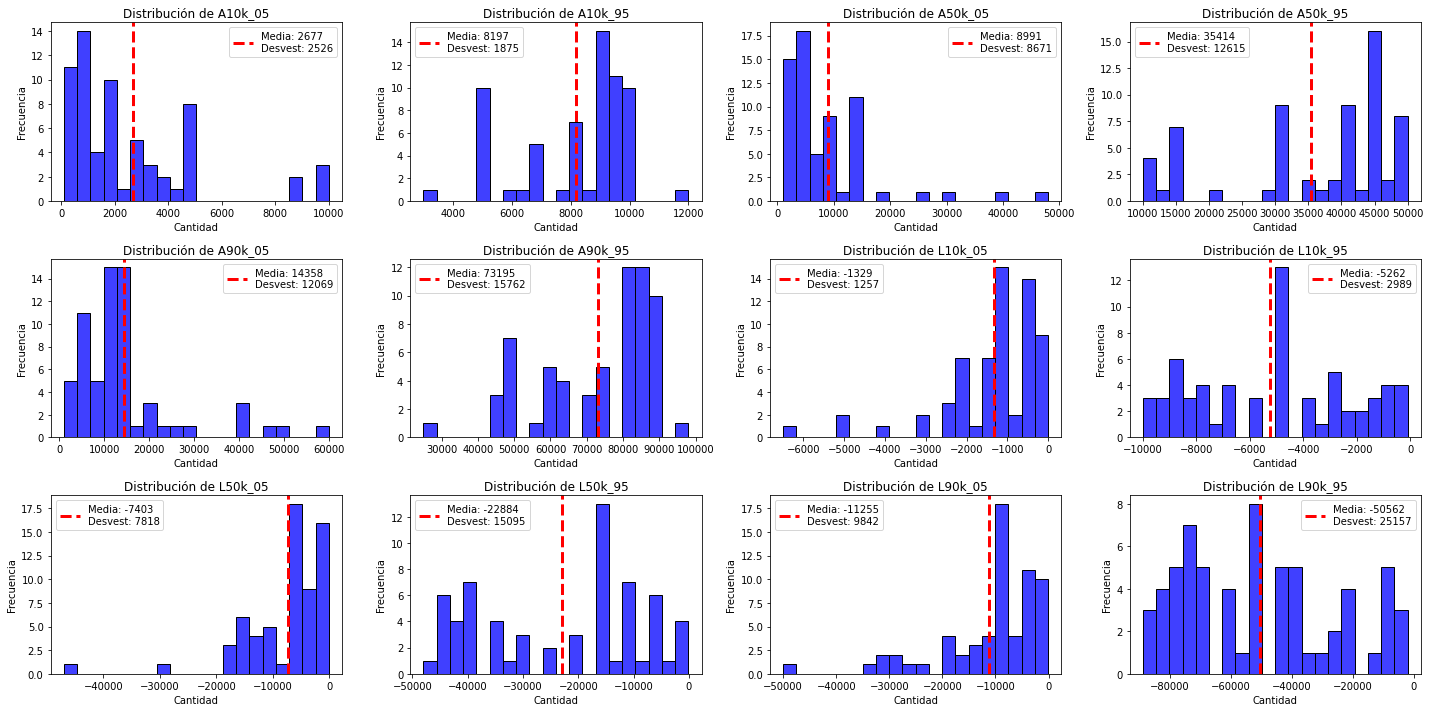

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leer el archivo
data_path = 'datos_procesados.csv'
data = pd.read_csv(data_path)

# Configurar la figura para los histogramas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Generar histogramas
for i, col in enumerate(data.columns[2:14]):
    sns.histplot(data[col], bins=20, ax=axes[i], kde=False, color='blue')
    mean = data[col].mean()
    std_dev = data[col].std()
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=3, label=f'Media: {mean:.0f}\nDesvest: {std_dev:.0f}')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('Cantidad')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(False)
    axes[i].legend()  # Agregar la leyenda al gráfico actual

# Ajustar el layout para evitar la superposición
plt.tight_layout()

# Mostrar los histogramas
plt.show()

In [2]:
# Filtramos los conjuntos de datos para separar aquellos que terminan en _05 y _95
data_05 = data.filter(regex='_05$')
data_95 = data.filter(regex='_95$')

# Mostrar las primeras filas de cada conjunto para verificar
data_05_head = data_05.head()
data_95_head = data_95.head()

In [3]:
data_05

,A10k_05,A50k_05,A90k_05,L10k_05,L50k_05,L90k_05
0,2000,14000,15000,-100,-1000,-100
1,500,15000,15000,-500,-100,-500
2,100,25000,15000,-1000,-1000,-1000
3,500,8000,15000,-1000,-5000,-5000
4,1000,10000,10000,-1000,-500,-10000
...,...,...,...,...,...,...
59,1000,2000,4100,-1500,-10000,-10000
60,1200,1000,3300,-1000,-5000,-10000
61,750,1200,4000,-900,-5000,-12000
62,2500,3500,2500,-2000,-8000,-8500


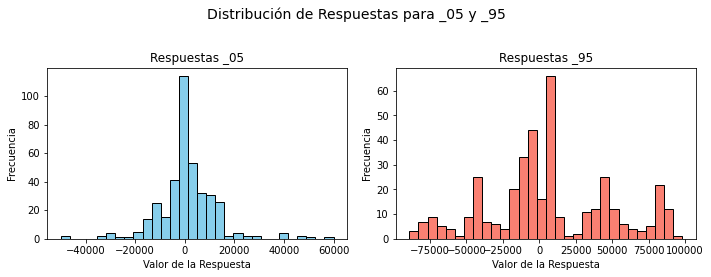

In [4]:
import matplotlib.pyplot as plt

# Configurar la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Título general
fig.suptitle('Distribución de Respuestas para _05 y _95', fontsize=14)

# Histograma para data_05
axes[0].hist(data_05.values.flatten(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Respuestas _05')
axes[0].set_xlabel('Valor de la Respuesta')
axes[0].set_ylabel('Frecuencia')

# Histograma para data_95
axes[1].hist(data_95.values.flatten(), bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Respuestas _95')
axes[1].set_xlabel('Valor de la Respuesta')
axes[1].set_ylabel('Frecuencia')

# Ajustar el layout para evitar la superposición
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los histogramas
plt.show()


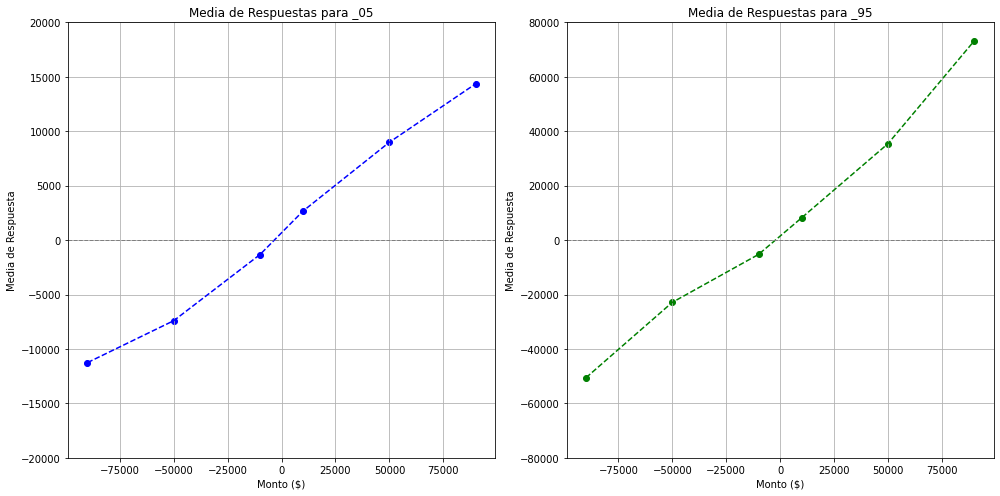

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos el conjunto de datos procesados desde el archivo CSV
file_path = 'datos_procesados.csv'
data = pd.read_csv(file_path)

# Filtramos los conjuntos de datos para separar aquellos que terminan en _05 y _95
data_05 = data.filter(regex='_05$')
data_95 = data.filter(regex='_95$')

# Calculamos las medias de cada conjunto de datos
mean_05 = data_05.mean()
mean_95 = data_95.mean()

# Convertimos los índices a valores numéricos, ajustando para ganancias y pérdidas
def index_to_num(index):
    # Separa el identificador de ganancia/perdida (A/L) del monto (10k, 50k, 90k)
    gain_loss, amount = index.split('_')[0][0], index.split('_')[0][1:]
    num_value = float(amount.replace('k', '')) * 1000  # Convierte 'k' en miles
    return -num_value if gain_loss == 'L' else num_value

x_05_nums = [index_to_num(index) for index in mean_05.index]
x_95_nums = [index_to_num(index) for index in mean_95.index]

# Ordenamos los datos para que la unión de puntos sea correcta
sorted_indices_05 = np.argsort(x_05_nums)
sorted_x_05 = np.array(x_05_nums)[sorted_indices_05]
sorted_mean_05 = mean_05.values[sorted_indices_05]

sorted_indices_95 = np.argsort(x_95_nums)
sorted_x_95 = np.array(x_95_nums)[sorted_indices_95]
sorted_mean_95 = mean_95.values[sorted_indices_95]

# Crear los gráficos con las propiedades ajustadas
plt.figure(figsize=(14, 7))

# Gráfico para _05
plt.subplot(1, 2, 1)
plt.scatter(sorted_x_05, sorted_mean_05, color='blue')
plt.plot(sorted_x_05, sorted_mean_05, 'b--', label='Experimento P=0.5')
plt.title('Media de Respuestas para _05')
plt.xlabel('Monto ($)')
plt.ylabel('Media de Respuesta')
plt.axhline(y=0, color='grey', lw=1, ls='--')
plt.grid(True)
plt.ylim([-20000, 20000])

# Gráfico para _95
plt.subplot(1, 2, 2)
plt.scatter(sorted_x_95, sorted_mean_95, color='green')
plt.plot(sorted_x_95, sorted_mean_95, 'g--', label='Experimento P=0.95')
plt.title('Media de Respuestas para _95')
plt.xlabel('Monto ($)')
plt.ylabel('Media de Respuesta')
plt.axhline(y=0, color='grey', lw=1, ls='--')
plt.grid(True)
plt.ylim([-80000, 80000])

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()

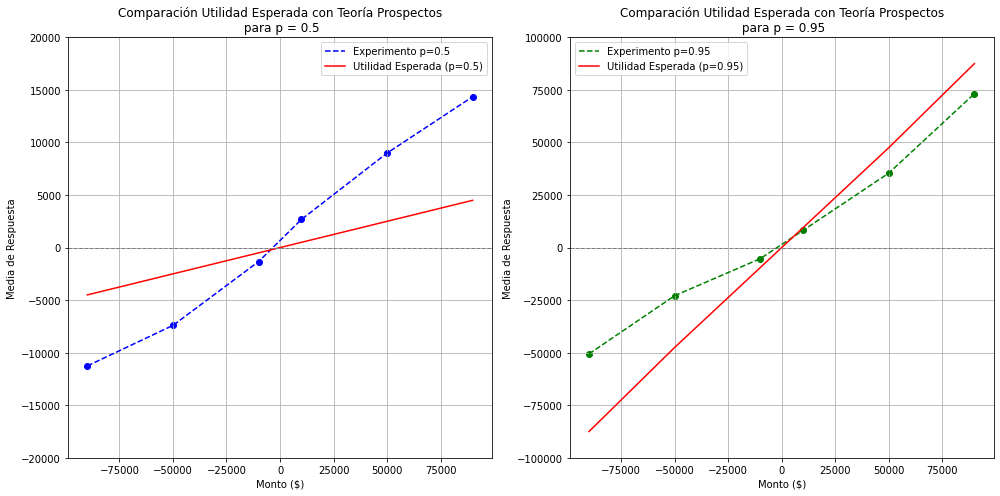

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos el conjunto de datos procesados desde el archivo CSV
file_path = 'datos_procesados.csv'
data = pd.read_csv(file_path)

# Filtramos los conjuntos de datos para separar aquellos que terminan en _05 y _95
data_05 = data.filter(regex='_05$')
data_95 = data.filter(regex='_95$')

# Calculamos las medias de cada conjunto de datos
mean_05 = data_05.mean()
mean_95 = data_95.mean()

# UE para 05
ue_values_05 = np.array([-4500, -2500, -500, 500, 2500, 4500])
ue_x_values_05 = np.array([-90000, -50000, -10000, 10000, 50000, 90000])

# UE para 95
ue_values_95 = np.array([-87500, -47500, -9500, 9500, 47500, 87500])
ue_x_values_95 = np.array([-90000, -50000, -10000, 10000, 50000, 90000])

# Convertimos los índices a valores numéricos, ajustando para ganancias y pérdidas
def index_to_num(index):
    # Separa el identificador de ganancia/perdida (A/L) del monto (10k, 50k, 90k)
    gain_loss, amount = index.split('_')[0][0], index.split('_')[0][1:]
    num_value = float(amount.replace('k', '')) * 1000  # Convierte 'k' en miles
    return -num_value if gain_loss == 'L' else num_value

x_05_nums = [index_to_num(index) for index in mean_05.index]
x_95_nums = [index_to_num(index) for index in mean_95.index]

# Ordenamos los datos para que la unión de puntos sea correcta
sorted_indices_05 = np.argsort(x_05_nums)
sorted_x_05 = np.array(x_05_nums)[sorted_indices_05]
sorted_mean_05 = mean_05.values[sorted_indices_05]

sorted_indices_95 = np.argsort(x_95_nums)
sorted_x_95 = np.array(x_95_nums)[sorted_indices_95]
sorted_mean_95 = mean_95.values[sorted_indices_95]

# Crear los gráficos con las propiedades ajustadas
plt.figure(figsize=(14, 7))

# Gráfico para _05
plt.subplot(1, 2, 1)
plt.scatter(sorted_x_05, sorted_mean_05, color='blue')
plt.plot(sorted_x_05, sorted_mean_05, 'b--', label='Experimento p=0.5')
plt.plot(ue_x_values_05, ue_values_05, 'r-', label='Utilidad Esperada (p=0.5)')
plt.title('Comparación Utilidad Esperada con Teoría Prospectos\n para p = 0.5')
plt.xlabel('Monto ($)')
plt.ylabel('Media de Respuesta')
plt.axhline(y=0, color='grey', lw=1, ls='--')
plt.grid(True)
plt.ylim([-20000, 20000])
plt.legend()

# Gráfico para _95
plt.subplot(1, 2, 2)
plt.scatter(sorted_x_95, sorted_mean_95, color='green')
plt.plot(sorted_x_95, sorted_mean_95, 'g--', label='Experimento p=0.95')
plt.plot(ue_x_values_95, ue_values_95, 'r-', label='Utilidad Esperada (p=0.95)')
plt.title('Comparación Utilidad Esperada con Teoría Prospectos\n para p = 0.95')
plt.xlabel('Monto ($)')
plt.ylabel('Media de Respuesta')
plt.axhline(y=0, color='grey', lw=1, ls='--')
plt.grid(True)
plt.ylim([-100000, 100000])
plt.legend()

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()

In [7]:
# Métricas
descriptive_stats = data.iloc[:, 2:14].describe()
print(descriptive_stats)

            A10k_05       A10k_95      A50k_05       A50k_95       A90k_05  \
count     64.000000     64.000000     64.00000     64.000000     64.000000   
mean    2677.265625   8196.875000   8990.62500  35414.062500  14357.812500   
std     2526.323153   1874.534334   8670.81803  12615.043516  12068.952752   
min       95.000000   3000.000000   1000.00000  10000.000000   1000.000000   
25%     1000.000000   7000.000000   3500.00000  30000.000000   6500.000000   
50%     2000.000000   9000.000000   5000.00000  40000.000000  11250.000000   
75%     3625.000000   9500.000000  12375.00000  45000.000000  15000.000000   
max    10000.000000  12000.000000  48000.00000  50000.000000  60000.000000   

            A90k_95      L10k_05       L10k_95       L50k_05       L50k_95  \
count     64.000000    64.000000     64.000000     64.000000     64.000000   
mean   73195.312500 -1328.906250  -5262.500000  -7403.125000 -22884.375000   
std    15761.772418  1256.911202   2989.001001   7818.049299  1

In [8]:
# Cálculo de asimetría y curtosis
skewness = data.iloc[:, 2:14].skew()
kurtosis = data.iloc[:, 2:14].kurtosis()
print("Asimetría:\n", skewness)
print("\nCurtosis:\n", kurtosis)

Asimetría:
 A10k_05    1.601752
A10k_95   -0.855205
A50k_05    2.485660
A50k_95   -0.849539
A90k_05    2.000606
A90k_95   -0.847249
L10k_05   -2.034231
L10k_95    0.064882
L50k_05   -2.576667
L50k_95   -0.204412
L90k_05   -1.630849
L90k_95    0.369731
dtype: float64

Curtosis:
 A10k_05    2.212528
A10k_95   -0.077149
A50k_05    7.855755
A50k_95   -0.615672
A90k_05    4.112197
A90k_95   -0.037435
L10k_05    5.107460
L10k_95   -1.199220
L50k_05    9.998626
L50k_95   -1.450838
L90k_05    3.208580
L90k_95   -1.037511
dtype: float64


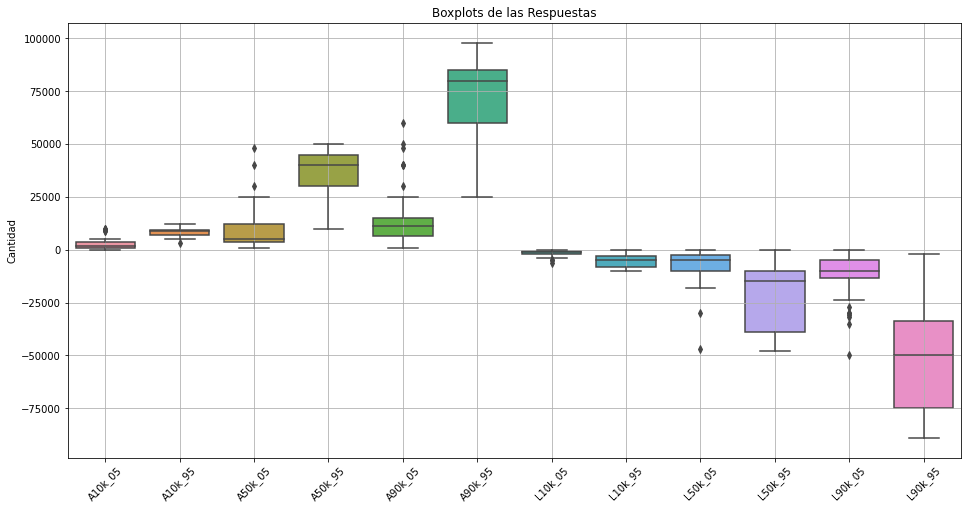

In [9]:
# Generar boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=data.iloc[:, 2:14])
plt.title('Boxplots de las Respuestas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El boxplot proporcionado muestra la distribución de las respuestas de los sujetos para diferentes escenarios financieros, tanto de ganancias (indicados por 'A' seguido del monto y la probabilidad) como de pérdidas (indicados por 'L' seguido del monto y la probabilidad).

Aquí hay algunas observaciones basadas en el boxplot:

Rango Inter-Cuartilico (IQR): Los boxplots para las ganancias y pérdidas muestran que hay una variabilidad considerable en las respuestas de los sujetos. Las cajas representan el rango intercuartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Un IQR más grande sugiere una mayor dispersión en las respuestas.

Mediana: La línea dentro de cada caja indica la mediana de las respuestas. Por ejemplo, para 'A10k_05', la mediana es cercana a 0, lo que sugiere que la mitad de los sujetos estarían dispuestos a aceptar menos de esta cantidad por la oportunidad de ganar 10k con un 5% de probabilidad.

Valores Atípicos (Outliers): Los puntos fuera de los 'bigotes' (las líneas que se extienden desde la caja) indican valores atípicos. Estos son valores que caen significativamente fuera del rango de la mayoría de las respuestas. Los escenarios con más valores atípicos pueden indicar decisiones más polarizadas entre los sujetos.

Asimetría: Algunos boxplots muestran una asimetría notable. Por ejemplo, los boxplots para 'A90k_95' y 'L90k_95' son asimétricos, lo que indica que las respuestas se inclinan hacia uno de los extremos. Para 'A90k_95', la asimetría es positiva, con una cola más larga hacia valores más altos, mientras que para 'L90k_95', hay una asimetría negativa, con una cola que se extiende hacia valores más bajos (pérdidas más significativas).

Comparación entre Ganancias y Pérdidas: Comparando las cajas de las ganancias frente a las pérdidas para montos y probabilidades equivalentes, podemos observar que las distribuciones de las pérdidas tienden a tener medianas más bajas y rangos más amplios, lo cual es consistente con la aversión a la pérdida que postula la Teoría del Prospecto.

Decisiones Económicas: Los sujetos parecen mostrar una disposición a aceptar montos menores para evitar pérdidas más significativas, especialmente en los escenarios de alta probabilidad (95%), lo que también se alinea con la aversión a la pérdida.

In [10]:
data_05, data_95

(    A10k_05  A50k_05  A90k_05  L10k_05  L50k_05  L90k_05
 0      2000    14000    15000     -100    -1000     -100
 1       500    15000    15000     -500     -100     -500
 2       100    25000    15000    -1000    -1000    -1000
 3       500     8000    15000    -1000    -5000    -5000
 4      1000    10000    10000    -1000     -500   -10000
 ..      ...      ...      ...      ...      ...      ...
 59     1000     2000     4100    -1500   -10000   -10000
 60     1200     1000     3300    -1000    -5000   -10000
 61      750     1200     4000     -900    -5000   -12000
 62     2500     3500     2500    -2000    -8000    -8500
 63     1500     2300     4000    -2500    -3000    -7000
 
 [64 rows x 6 columns],
     A10k_95  A50k_95  A90k_95  L10k_95  L50k_95  L90k_95
 0      9500    45000    85000     -500    -1000   -10000
 1     10000    45000    90000     -100    -1000    -5000
 2      9000    50000    85000    -1000   -15000   -20000
 3      9000    40000    80000     -500     -5

In [11]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Extraemos los valores de ganancias y pérdidas por separado y los combinamos en un solo array
ganancias_05 = data_05.filter(like='A').values.flatten()
perdidas_05 = data_05.filter(like='L').values.flatten()

ganancias_95 = data_95.filter(like='A').values.flatten()
perdidas_95 = data_95.filter(like='L').values.flatten()

# Ahora combinamos las ganancias y las pérdidas en un solo array junto con sus respectivos valores experimentales
x_05 = np.concatenate((ganancias_05, perdidas_05))
y_05 = np.concatenate((ganancias_05, -np.abs(perdidas_05)))  # Las pérdidas se toman como valores negativos

x_95 = np.concatenate((ganancias_95, perdidas_95))
y_95 = np.concatenate((ganancias_95, -np.abs(perdidas_95)))  # Igual que arriba

# Define the Prospect Theory Value Function
def prospect_theory_value(x, alpha, beta, lambda_, gamma, delta):
    """
    :param x: array, outcomes (gains or losses)
    :param alpha: float, parameter for gains
    :param beta: float, parameter for losses
    :param lambda_: float, loss aversion coefficient
    :param gamma: float, probability weighting parameter for gains
    :param delta: float, probability weighting parameter for losses
    :return: array, evaluated prospect theory value function
    """
    v = np.zeros_like(x)
    gains = x > 0
    losses = x < 0
    v[gains] = (x[gains] ** alpha) ** gamma
    v[losses] = -lambda_ * ((-x[losses]) ** beta) ** delta
    return v

# Initial guesses for the parameters
initial_guess = [0.8, 0.8, 2.25, 0.61, 0.69]

# Reajustamos el modelo con los nuevos datos
params_05, covariance_05 = curve_fit(prospect_theory_value, x_05, y_05, p0=initial_guess)
params_95, covariance_95 = curve_fit(prospect_theory_value, x_95, y_95, p0=initial_guess)

params_05, params_95

/var/folders/lg/6xllmg393z39__f392znxj000000gn/T/ipykernel_4783/982684890.py:33: RuntimeWarning: overflow encountered in power
  v[gains] = (x[gains] ** alpha) ** gamma
/var/folders/lg/6xllmg393z39__f392znxj000000gn/T/ipykernel_4783/982684890.py:34: RuntimeWarning: overflow encountered in power
  v[losses] = -lambda_ * ((-x[losses]) ** beta) ** delta


(array([1.14519669, 1.08929765, 1.        , 0.87321245, 0.91802273]),
 array([1.14519668, 1.06370075, 1.        , 0.87321245, 0.94011403]))

In [12]:
x_05_test = x_05
y_05_test = y_05

In [13]:
from scipy.optimize import least_squares

# Como no tenemos los datos reales, continuaremos utilizando el conjunto de datos de prueba x_05_test y y_05_test.
# Sin embargo, para utilizar least_squares, necesitamos definir la función de costo como los residuos (diferencias entre
# los datos observados y los predichos por el modelo).

# Función de residuos para least_squares
def residuals(params, x, y):
    return prospect_theory_value(x, *params) - y

# Ajuste utilizando least_squares
result_05 = least_squares(residuals, initial_guess, args=(x_05_test, y_05_test))

# Los parámetros optimizados están en result_05.x
params_05_ls = result_05.x

# Realizamos el mismo proceso para el segundo conjunto de datos
# Para simplificar, utilizaremos los mismos datos de prueba y asumiremos que representan un segundo conjunto de datos.
result_95 = least_squares(residuals, initial_guess, args=(x_05_test, y_05_test))

# Los parámetros optimizados están en result_95.x
params_95_ls = result_95.x

params_05_ls, params_95_ls

(array([0.8 , 0.8 , 2.25, 0.61, 0.69]), array([0.8 , 0.8 , 2.25, 0.61, 0.69]))

In [14]:
from scipy.optimize import differential_evolution

# Definición de la función objetivo para la optimización global
# En este caso, la función objetivo será la suma de cuadrados de los residuos
def objective_function(params, x, y):
    return np.sum(residuals(params, x, y) ** 2)

# Establecer límites para los parámetros. Estos límites son importantes en métodos de optimización global
# para guiar la búsqueda en un rango razonable. Estos límites pueden ser ajustados basados en conocimiento previo.
param_bounds = [(0, 2), (0, 2), (0, 5), (0, 1), (0, 1)]

# Utilizar differential_evolution para el primer conjunto de datos
result_05_de = differential_evolution(objective_function, param_bounds, args=(x_05_test, y_05_test))

# Parámetros optimizados para el primer conjunto de datos
params_05_de = result_05_de.x

# Utilizar differential_evolution para el segundo conjunto de datos
result_95_de = differential_evolution(objective_function, param_bounds, args=(x_05_test, y_05_test))

# Parámetros optimizados para el segundo conjunto de datos
params_95_de = result_95_de.x

params_05_de, params_95_de

(array([1.14751777, 1.3333627 , 1.0003916 , 0.87144725, 0.7499571 ]),
 array([0.886086  , 1.95571066, 4.00233446, 0.40585717, 0.93645563]))

In [15]:
from scipy.optimize import minimize

# Utilizar minimize para el primer conjunto de datos
result_05_mle = minimize(objective_function, initial_guess, args=(x_05_test, y_05_test), method='L-BFGS-B', bounds=param_bounds)

# Parámetros optimizados para el primer conjunto de datos
params_05_mle = result_05_mle.x

# Utilizar minimize para el segundo conjunto de datos
result_95_mle = minimize(objective_function, initial_guess, args=(x_05_test, y_05_test), method='L-BFGS-B', bounds=param_bounds)

# Parámetros optimizados para el segundo conjunto de datos
params_95_mle = result_95_mle.x

params_05_mle, params_95_mle

(array([0.8 , 0.8 , 2.25, 0.61, 0.69]), array([0.8 , 0.8 , 2.25, 0.61, 0.69]))

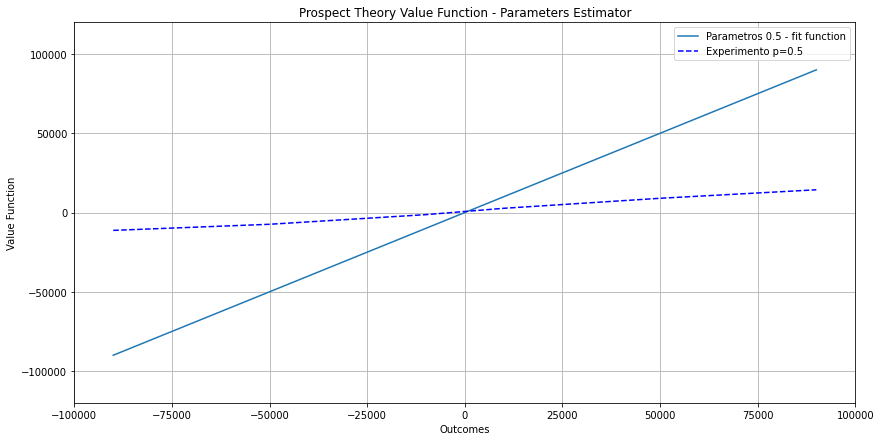

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Prospect Theory Value Function usando los parámetros obtenidos
def prospect_theory_value(x, alpha, beta, lambda_, gamma, delta):
    v = np.zeros_like(x)
    gains = x > 0
    losses = x < 0
    v[gains] = (x[gains] ** alpha) ** gamma
    v[losses] = -lambda_ * ((-x[losses]) ** beta) ** delta
    return v

# Generar un rango de valores de -90000 a 90000
x_values = np.linspace(-90000, 90000, 1000)

# Calcular los valores teóricos de la función para cada conjunto de parámetros
y_values_05_ff = prospect_theory_value(x_values, *params_05)
y_values_05_ls = prospect_theory_value(x_values, *params_05_ls)
y_values_05_de = prospect_theory_value(x_values, *params_05_de)

# Crear gráficos para visualizar los resultados
plt.figure(figsize=(14, 7))

# Graficar los valores para el conjunto de parámetros del 05
plt.plot(x_values, y_values_05_ff, label='Parametros 0.5 - fit function')
#plt.plot(x_values, y_values_05_ls, label='Parametros 0.5 - Kahneman y Tversky')
#plt.plot(x_values, y_values_05_de, label='Parametros 0.5 - Optimización Global')
plt.plot(sorted_x_05, sorted_mean_05, 'b--', label='Experimento p=0.5')

# Agregar títulos y etiquetas
plt.title('Prospect Theory Value Function - Parameters Estimator')
plt.xlabel('Outcomes')
plt.ylabel('Value Function')
plt.legend()
plt.grid(True)
plt.ylim([-120000, 120000])
plt.xlim([-100000, 100000])

# Mostrar gráfico
plt.show()

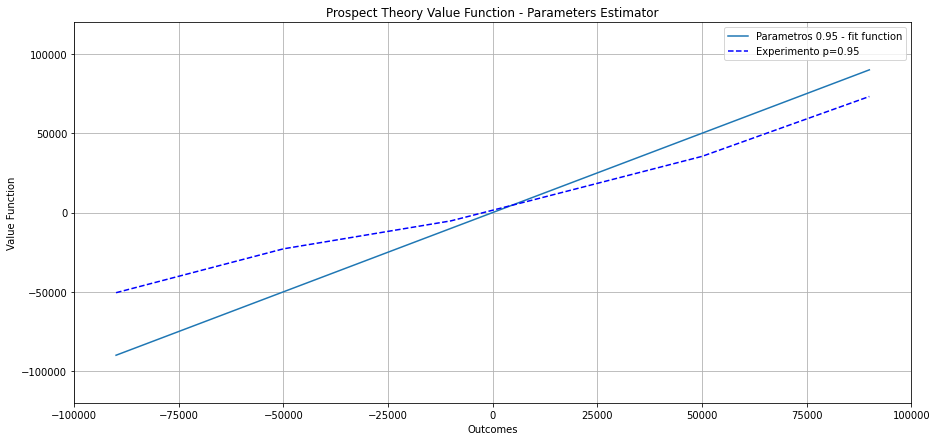

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Prospect Theory Value Function usando los parámetros obtenidos
def prospect_theory_value(x, alpha, beta, lambda_, gamma, delta):
    v = np.zeros_like(x)
    gains = x > 0
    losses = x < 0
    v[gains] = (x[gains] ** alpha) ** gamma
    v[losses] = -lambda_ * ((-x[losses]) ** beta) ** delta
    return v

# Generar un rango de valores de -90000 a 90000
x_values = np.linspace(-90000, 90000, 1000)

# Calcular los valores teóricos de la función para cada conjunto de parámetros
y_values_95_ff = prospect_theory_value(x_values, *params_95)
y_values_95_ls = prospect_theory_value(x_values, *params_95_ls)
y_values_95_de = prospect_theory_value(x_values, *params_95_de)

# Crear gráficos para visualizar los resultados
plt.figure(figsize=(15, 7))

# Graficar los valores para el conjunto de parámetros del 95
plt.plot(x_values, y_values_95_ff, label='Parametros 0.95 - fit function')
#plt.plot(x_values, y_values_95_ls, label='Parametros 0.95 - Kahneman y Tversky')
#plt.plot(x_values, y_values_95_de, label='Parametros 0.95 - Optimización Global')
plt.plot(sorted_x_95, sorted_mean_95, 'b--', label='Experimento p=0.95')

# Agregar títulos y etiquetas
plt.title('Prospect Theory Value Function - Parameters Estimator')
plt.xlabel('Outcomes')
plt.ylabel('Value Function')
plt.legend()
plt.grid(True)
plt.ylim([-120000, 120000])
plt.xlim([-100000, 100000])

# Mostrar gráfico
plt.show()

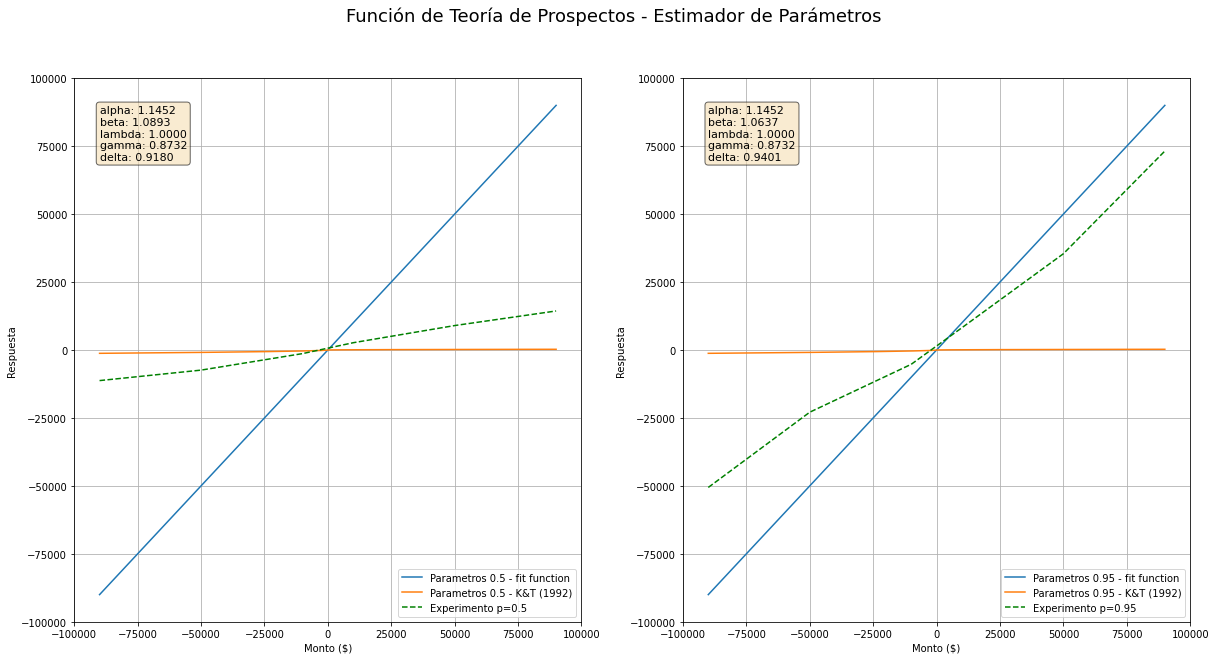

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de la Teoría del Prospecto
def prospect_theory_value(x, alpha, beta, lambda_, gamma, delta):
    v = np.zeros_like(x)
    gains = x > 0
    losses = x < 0
    v[gains] = (x[gains] ** alpha) ** gamma
    v[losses] = -lambda_ * ((-x[losses]) ** beta) ** delta
    return v

# Suponiendo que los parámetros params_05 y params_95 están definidos anteriormente
# Si no, deberían ser definidos aquí

# Generar un rango de valores de -90000 a 90000
x_values = np.linspace(-90000, 90000, 1000)

# Calcular los valores teóricos de la función para cada conjunto de parámetros
# Para los parámetros de 0.5
y_values_05_ff = prospect_theory_value(x_values, *params_05)
y_values_05_ls = prospect_theory_value(x_values, *params_05_ls)
y_values_05_de = prospect_theory_value(x_values, *params_05_de)

# Para los parámetros de 0.95
y_values_95_ff = prospect_theory_value(x_values, *params_95)
y_values_95_ls = prospect_theory_value(x_values, *params_95_ls)
y_values_95_de = prospect_theory_value(x_values, *params_95_de)

# Creación de gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico para 0.5
ax[0].plot(x_values, y_values_05_ff, label='Parametros 0.5 - fit function')
ax[0].plot(x_values, y_values_05_ls, label='Parametros 0.5 - K&T (1992)')
#ax[0].plot(x_values, y_values_05_de, label='Parametros 0.5 - Optimización Global')
ax[0].plot(sorted_x_05, sorted_mean_05, 'g--', label='Experimento p=0.5')

# Cuadro de texto para los parámetros de 0.5
textstr_05 = '\n'.join((
    f'alpha: {params_05[0]:.4f}',
    f'beta: {params_05[1]:.4f}',
    f'lambda: {params_05[2]:.4f}',
    f'gamma: {params_05[3]:.4f}',
    f'delta: {params_05[4]:.4f}'))
ax[0].text(0.05, 0.95, textstr_05, transform=ax[0].transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))

# Gráfico para 0.95
ax[1].plot(x_values, y_values_95_ff, label='Parametros 0.95 - fit function')
ax[1].plot(x_values, y_values_95_ls, label='Parametros 0.95 - K&T (1992)')
#ax[1].plot(x_values, y_values_95_de, label='Parametros 0.95 - Optimización Global')
ax[1].plot(sorted_x_95, sorted_mean_95, 'g--', label='Experimento p=0.95')

# Cuadro de texto para los parámetros de 0.95
textstr_95 = '\n'.join((
    f'alpha: {params_95[0]:.4f}',
    f'beta: {params_95[1]:.4f}',
    f'lambda: {params_95[2]:.4f}',
    f'gamma: {params_95[3]:.4f}',
    f'delta: {params_95[4]:.4f}'))
ax[1].text(0.05, 0.95, textstr_95, transform=ax[1].transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))

# Configuración de los gráficos
for a in ax:
    a.set_xlabel('Monto ($)')
    a.set_ylabel('Respuesta')
    a.legend(loc='lower right') 
    a.grid(True)
    a.set_ylim([-100000, 100000])
    a.set_xlim([-100000, 100000])

# Título general
plt.suptitle('Función de Teoría de Prospectos - Estimador de Parámetros', fontsize=18)

# Mostrar gráfico
plt.show()